<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  94 non-null     float64
 1   Review  31 non-null     object 
dtypes: float64(1), object(1)
memory usage: 3.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 5 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  31 non-null     float64
 1   Review  31 non-null     object 
dtypes: float64(1), object(1)
memory usage: 744.0+ bytes


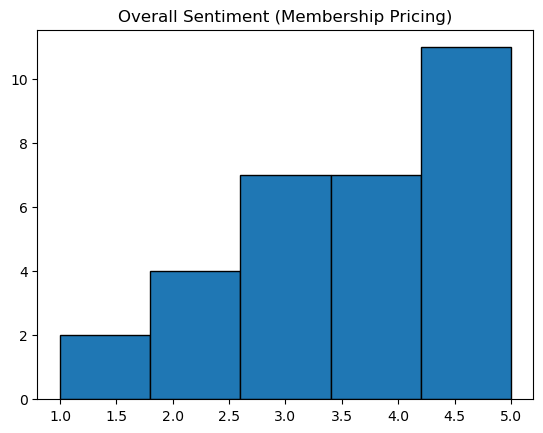

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rhseb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rhseb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('price', 12), ('teams', 12), ('think', 10), ('necc', 10), ('year', 9)]


,Rating,Review,Tokens,Filtered_Tokens,Lemmatized_Tokens,TFIDF_Tokens
5,5.0,please don t raise it,"[please, don, t, raise, it]","[please, raise]","[please, raise]",please raise
7,4.0,feel the price increase was necessary and good...,"[feel, the, price, increase, was, necessary, a...","[feel, price, increase, necessary, good, futur...","[feel, price, increase, necessary, good, futur...",feel price increase necessary good future comp...
8,3.0,i think the price point for all games unlimite...,"[i, think, the, price, point, for, all, games,...","[think, price, point, games, unlimited, regist...","[think, price, point, game, unlimited, registr...",think price point game unlimited registrations...
13,5.0,very fair price for what we are getting out of it,"[very, fair, price, for, what, we, are, gettin...","[fair, price, getting]","[fair, price, get]",fair price get
14,2.0,our school originally joined because it was a ...,"[our, school, originally, joined, because, it,...","[school, originally, joined, free, collegiate,...","[school, originally, join, free, collegiate, e...",school originally join free collegiate esports...
21,4.0,relatively low price for competition throughou...,"[relatively, low, price, for, competition, thr...","[relatively, low, price, competition, througho...","[relatively, low, price, competition, througho...",relatively low price competition throughout year
22,1.0,as a program who struggles with a budget it is...,"[as, a, program, who, struggles, with, a, budg...","[program, struggles, budget, hard, pay, every,...","[program, struggle, budget, hard, pay, every, ...",program struggle budget hard pay every year le...
23,5.0,you definitely get what you pay for in this le...,"[you, definitely, get, what, you, pay, for, in...","[definitely, get, pay, league, pricing, great,...","[definitely, get, pay, league, price, great, a...",definitely get pay league price great agree pr...
24,5.0,best pricing system offered by any league,"[best, pricing, system, offered, by, any, league]","[best, pricing, system, offered, league]","[best, price, system, offer, league]",best price system offer league
30,4.0,raise it please maybe not for this upcoming ye...,"[raise, it, please, maybe, not, for, this, upc...","[raise, please, maybe, upcoming, year, already...","[raise, please, maybe, upcoming, year, already...",raise please maybe upcoming year already might...


In [7]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

#Loading The Dataset
df = pd.read_csv('NECC Membership Pricing .csv')

#Seeing The Data
df.head(10)

#Basic EDA
df.info()

#Identifying Null Reviews
df.isnull().sum()

#Removing Null Reviews
df = df.dropna(subset=['Review'])
df.info()

#Showing The Overall Sentiment
x = df['Rating']
plt.hist(x, bins=5, edgecolor='black')
plt.title("Overall Sentiment (Membership Pricing)")
plt.show()

#Removing Stop Words
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text) 
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

df['Review'] = df['Review'].apply(clean_text)

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('wordnet')

def tokenize_text(text):
    tokens = word_tokenize(text) 
    return tokens  

df['Tokens'] = df['Review'].apply(tokenize_text)

from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)

from collections import Counter 
all_filtered_tokens = [word for tokens in df['Filtered_Tokens'] for word in tokens]
word_counts_after_removal = Counter(all_filtered_tokens)
most_common_words_after_removal = word_counts_after_removal.most_common(5)
print(most_common_words_after_removal)

from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

df['Lemmatized_Tokens'] = df['Filtered_Tokens'].apply(lemmatize_tokens)

from sklearn.feature_extraction.text import TfidfVectorizer

#performing TF-IDF vectorization
def apply_tfidf(df):
    df['TFIDF_Tokens'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['TFIDF_Tokens'])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

# Applying TF-IDF on our Dataframe
tfidf_matrix, feature_names = apply_tfidf(df)
df.head(10)